In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

sns.set_theme(style = 'whitegrid', context='talk', palette='Greys')

## MLP Data

In [2]:
mlp = load("bias_symptoms_mlp_mlp.joblib")
rf = load("bias_symptoms_mlp_rf.joblib")
xgb = load("bias_symptoms_mlp_xgb.joblib")

In [4]:
data = pd.read_csv('result_class_mlp/bias_symptoms_mlp.csv', index_col=[0,1])
data.index = data.index.droplevel(0)
labels = ['statistical_parity', 'equal_opportunity', 'average_odds']

In [5]:
# AUC

sp_mlp_train = []
sp_rf_train = []
sp_xgb_train = []
sp_mlp_test = []
sp_rf_test = []
sp_xgb_test = []

eo_mlp_train = []
eo_rf_train = []
eo_xgb_train = []
eo_mlp_test = []
eo_rf_test = []
eo_xgb_test = []

ao_mlp_train = []
ao_rf_train = []
ao_xgb_train = []
ao_mlp_test = []
ao_rf_test = []
ao_xgb_test = []

# Average Precision

sp_mlp_train_ap = []
sp_rf_train_ap = []
sp_xgb_train_ap = []
sp_mlp_test_ap = []
sp_rf_test_ap = []
sp_xgb_test_ap = []

eo_mlp_train_ap = []
eo_rf_train_ap = []
eo_xgb_train_ap = []
eo_mlp_test_ap = []
eo_rf_test_ap = []
eo_xgb_test_ap = []

ao_mlp_train_ap = []
ao_rf_train_ap = []
ao_xgb_train_ap = []
ao_mlp_test_ap = []
ao_rf_test_ap = []
ao_xgb_test_ap = []

# Precision

sp_mlp_train_prec = []
sp_rf_train_prec = []
sp_xgb_train_prec = []
sp_mlp_test_prec = []
sp_rf_test_prec = []
sp_xgb_test_prec = []

eo_mlp_train_prec = []
eo_rf_train_prec = []
eo_xgb_train_prec = []
eo_mlp_test_prec = []
eo_rf_test_prec = []
eo_xgb_test_prec = []

ao_mlp_train_prec = []
ao_rf_train_prec = []
ao_xgb_train_prec = []
ao_mlp_test_prec = []
ao_rf_test_prec = []
ao_xgb_test_prec = []

# Recall

sp_mlp_train_rec = []
sp_rf_train_rec = []
sp_xgb_train_rec = []
sp_mlp_test_rec = []
sp_rf_test_rec = []
sp_xgb_test_rec = []

eo_mlp_train_rec = []
eo_rf_train_rec = []
eo_xgb_train_rec = []
eo_mlp_test_rec = []
eo_rf_test_rec = []
eo_xgb_test_rec = []

ao_mlp_train_rec = []
ao_rf_train_rec = []
ao_xgb_train_rec = []
ao_mlp_test_rec = []
ao_rf_test_rec = []
ao_xgb_test_rec = []

# F1 Score

sp_mlp_train_f1 = []
sp_rf_train_f1 = []
sp_xgb_train_f1 = []
sp_mlp_test_f1 = []
sp_rf_test_f1 = []
sp_xgb_test_f1 = []

eo_mlp_train_f1 = []
eo_rf_train_f1 = []
eo_xgb_train_f1 = []
eo_mlp_test_f1 = []
eo_rf_test_f1 = []
eo_xgb_test_f1 = []

ao_mlp_train_f1 = []
ao_rf_train_f1 = []
ao_xgb_train_f1 = []
ao_mlp_test_f1 = []
ao_rf_test_f1 = []
ao_xgb_test_f1 = []

# Accuracy

sp_mlp_train_acc = []
sp_rf_train_acc = []
sp_xgb_train_acc = []
sp_mlp_test_acc = []
sp_rf_test_acc = []
sp_xgb_test_acc = []

eo_mlp_train_acc = []
eo_rf_train_acc = []
eo_xgb_train_acc = []
eo_mlp_test_acc = []
eo_rf_test_acc = []
eo_xgb_test_acc = []

ao_mlp_train_acc = []
ao_rf_train_acc = []
ao_xgb_train_acc = []
ao_mlp_test_acc = []
ao_rf_test_acc = []
ao_xgb_test_acc = []

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scaler = StandardScaler()
for itrain, itest in kfold.split(data.index.unique().values):
    train_index = data.index.unique()[itrain]
    test_index = data.index.unique()[itest]
    print(train_index)
    print(test_index)
    train = data.loc[train_index]
    test = data.loc[test_index]

    mlp.fit(train.drop(columns=labels), train[labels])
    rf.fit(train.drop(columns=labels), train[labels])
    xgb.fit(train.drop(columns=labels), train[labels])

    mlp_train = mlp.predict_proba(train.drop(columns=labels))
    rf_train = rf.predict_proba(train.drop(columns=labels))
    xgb_train = xgb.predict_proba(train.drop(columns=labels))
    mlp_test = mlp.predict_proba(test.drop(columns=labels))
    rf_test = rf.predict_proba(test.drop(columns=labels))
    xgb_test = xgb.predict_proba(test.drop(columns=labels))

    mlp_train_pred = mlp.predict(train.drop(columns=labels))
    rf_train_pred = rf.predict(train.drop(columns=labels))
    xgb_train_pred = xgb.predict(train.drop(columns=labels))
    mlp_test_pred = mlp.predict(test.drop(columns=labels))
    rf_test_pred = rf.predict(test.drop(columns=labels))
    xgb_test_pred = xgb.predict(test.drop(columns=labels))

    sp_mlp_train.append(roc_auc_score(train["statistical_parity"], mlp_train[:, 0]))
    sp_rf_train.append(roc_auc_score(train["statistical_parity"], rf_train[0][:, 1]))
    sp_xgb_train.append(roc_auc_score(train["statistical_parity"], xgb_train[:, 0]))
    sp_mlp_test.append(roc_auc_score(test["statistical_parity"], mlp_test[:, 0]))
    sp_rf_test.append(roc_auc_score(test["statistical_parity"], rf_test[0][:, 1]))
    sp_xgb_test.append(roc_auc_score(test["statistical_parity"], xgb_test[:, 0]))

    eo_mlp_train.append(roc_auc_score(train["equal_opportunity"], mlp_train[:, 1]))
    eo_rf_train.append(roc_auc_score(train["equal_opportunity"], rf_train[1][:, 1]))
    eo_xgb_train.append(roc_auc_score(train["equal_opportunity"], xgb_train[:, 1]))
    eo_mlp_test.append(roc_auc_score(test["equal_opportunity"], mlp_test[:, 1]))
    eo_rf_test.append(roc_auc_score(test["equal_opportunity"], rf_test[1][:, 1]))
    eo_xgb_test.append(roc_auc_score(test["equal_opportunity"], xgb_test[:, 1]))

    ao_mlp_train.append(roc_auc_score(train["average_odds"], mlp_train[:, 2]))
    ao_rf_train.append(roc_auc_score(train["average_odds"], rf_train[2][:, 1]))
    ao_xgb_train.append(roc_auc_score(train["average_odds"], xgb_train[:, 2]))
    ao_mlp_test.append(roc_auc_score(test["average_odds"], mlp_test[:, 2]))
    ao_rf_test.append(roc_auc_score(test["average_odds"], rf_test[2][:, 1]))
    ao_xgb_test.append(roc_auc_score(test["average_odds"], xgb_test[:, 2]))

    sp_mlp_train_ap.append(average_precision_score(train["statistical_parity"], mlp_train[:, 0]))
    sp_rf_train_ap.append(average_precision_score(train["statistical_parity"], rf_train[0][:, 1]))
    sp_xgb_train_ap.append(average_precision_score(train["statistical_parity"], xgb_train[:, 0]))
    sp_mlp_test_ap.append(average_precision_score(test["statistical_parity"], mlp_test[:, 0]))
    sp_rf_test_ap.append(average_precision_score(test["statistical_parity"], rf_test[0][:, 1]))
    sp_xgb_test_ap.append(average_precision_score(test["statistical_parity"], xgb_test[:, 0]))

    eo_mlp_train_ap.append(average_precision_score(train["equal_opportunity"], mlp_train[:, 1]))
    eo_rf_train_ap.append(average_precision_score(train["equal_opportunity"], rf_train[1][:, 1]))
    eo_xgb_train_ap.append(average_precision_score(train["equal_opportunity"], xgb_train[:, 1]))
    eo_mlp_test_ap.append(average_precision_score(test["equal_opportunity"], mlp_test[:, 1]))
    eo_rf_test_ap.append(average_precision_score(test["equal_opportunity"], rf_test[1][:, 1]))
    eo_xgb_test_ap.append(average_precision_score(test["equal_opportunity"], xgb_test[:, 1]))

    ao_mlp_train_ap.append(average_precision_score(train["average_odds"], mlp_train[:, 2]))
    ao_rf_train_ap.append(average_precision_score(train["average_odds"], rf_train[2][:, 1]))
    ao_xgb_train_ap.append(average_precision_score(train["average_odds"], xgb_train[:, 2]))
    ao_mlp_test_ap.append(average_precision_score(test["average_odds"], mlp_test[:, 2]))
    ao_rf_test_ap.append(average_precision_score(test["average_odds"], rf_test[2][:, 1]))
    ao_xgb_test_ap.append(average_precision_score(test["average_odds"], xgb_test[:, 2]))

    sp_mlp_train_prec.append(precision_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_prec.append(precision_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_prec.append(precision_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_prec.append(precision_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_prec.append(precision_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_prec.append(precision_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_prec.append(precision_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_prec.append(precision_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_prec.append(precision_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_prec.append(precision_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_prec.append(precision_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_prec.append(precision_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_prec.append(precision_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_prec.append(precision_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_prec.append(precision_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_prec.append(precision_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_prec.append(precision_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_prec.append(precision_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_rec.append(recall_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_rec.append(recall_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_rec.append(recall_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_rec.append(recall_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_rec.append(recall_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_rec.append(recall_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_rec.append(recall_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_rec.append(recall_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_rec.append(recall_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_rec.append(recall_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_rec.append(recall_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_rec.append(recall_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_rec.append(recall_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_rec.append(recall_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_rec.append(recall_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_rec.append(recall_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_rec.append(recall_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_rec.append(recall_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_f1.append(f1_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_f1.append(f1_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_f1.append(f1_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_f1.append(f1_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_f1.append(f1_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_f1.append(f1_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_f1.append(f1_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_f1.append(f1_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_f1.append(f1_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_f1.append(f1_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_f1.append(f1_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_f1.append(f1_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_f1.append(f1_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_f1.append(f1_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_f1.append(f1_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_f1.append(f1_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_f1.append(f1_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_f1.append(f1_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_acc.append(accuracy_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_acc.append(accuracy_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_acc.append(accuracy_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_acc.append(accuracy_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_acc.append(accuracy_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_acc.append(accuracy_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_acc.append(accuracy_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_acc.append(accuracy_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_acc.append(accuracy_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_acc.append(accuracy_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_acc.append(accuracy_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_acc.append(accuracy_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_acc.append(accuracy_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_acc.append(accuracy_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_acc.append(accuracy_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_acc.append(accuracy_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_acc.append(accuracy_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_acc.append(accuracy_score(test["average_odds"], xgb_test_pred[:, 2]))

Index(['arrhythmia', 'bank', 'cmc', 'compas', 'credit', 'crime', 'diabetic',
       'german', 'health', 'ibm', 'law', 'medical', 'obesity', 'placement',
       'ricci', 'student', 'us', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['adult', 'drug', 'hearth', 'park', 'resyduo'], dtype='object', name='data')
Index(['adult', 'bank', 'cmc', 'compas', 'crime', 'diabetic', 'drug', 'health',
       'hearth', 'ibm', 'medical', 'obesity', 'park', 'placement', 'resyduo',
       'ricci', 'student', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['arrhythmia', 'credit', 'german', 'law', 'us'], dtype='object', name='data')
Index(['adult', 'arrhythmia', 'credit', 'crime', 'diabetic', 'drug', 'german',
       'health', 'hearth', 'law', 'medical', 'park', 'placement', 'resyduo',
       'ricci', 'student', 'us', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['bank', 'cmc', 'compas', 'ibm', 'obesity'], dtype='object', name='data')
Index(['adult', 'arrhythmia'

In [6]:
def get_full_metrics(sp_mlp_train, sp_rf_train, sp_xgb_train, sp_mlp_test, sp_rf_test, sp_xgb_test, eo_mlp_train, eo_rf_train, eo_xgb_train, eo_mlp_test, eo_rf_test, eo_xgb_test, ao_mlp_train, ao_rf_train, ao_xgb_train, ao_mlp_test, ao_rf_test, ao_xgb_test):
    df_sp = pd.DataFrame(
        {"MLP": sp_mlp_train, "RF": sp_rf_train, "XGB": sp_xgb_train, "Fold": "Train"}
    )
    df_sp = pd.concat(
        [
            df_sp,
            pd.DataFrame(
                {"MLP": sp_mlp_test, "RF": sp_rf_test, "XGB": sp_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_sp = pd.melt(df_sp, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_sp["Metric"] = "Statistical Parity"
    df_eo = pd.DataFrame(
        {"MLP": eo_mlp_train, "RF": eo_rf_train, "XGB": eo_xgb_train, "Fold": "Train"}
    )
    df_eo = pd.concat(
        [
            df_eo,
            pd.DataFrame(
                {"MLP": eo_mlp_test, "RF": eo_rf_test, "XGB": eo_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_eo = pd.melt(df_eo, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_eo["Metric"] = "Equal Opportunity"

    df_ao = pd.DataFrame(
        {"MLP": ao_mlp_train, "RF": ao_rf_train, "XGB": ao_xgb_train, "Fold": "Train"}
    )
    df_ao = pd.concat(
        [
            df_ao,
            pd.DataFrame(
                {"MLP": ao_mlp_test, "RF": ao_rf_test, "XGB": ao_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_ao = pd.melt(df_ao, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_ao["Metric"] = "Average Odds"
    auc = pd.concat([df_sp, df_eo, df_ao])
    return auc

## AUC Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


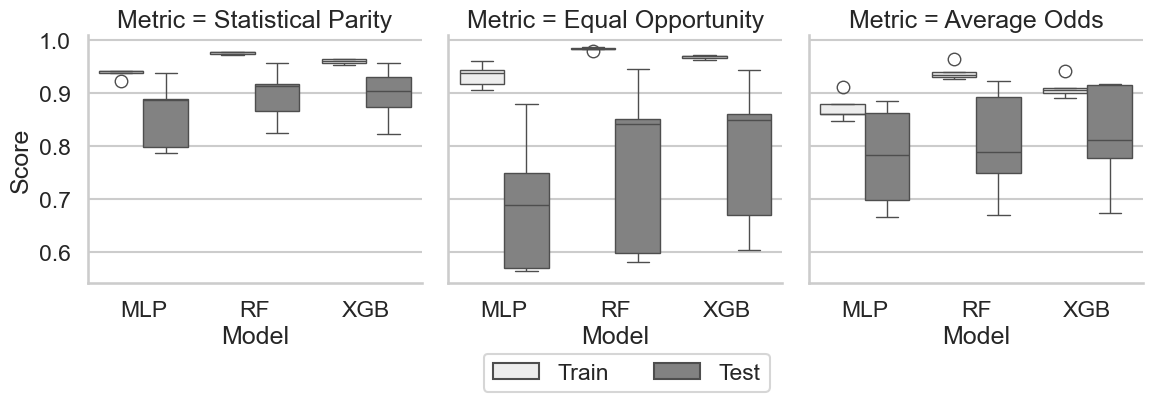

In [7]:
auc = get_full_metrics(sp_mlp_train, sp_rf_train, sp_xgb_train, sp_mlp_test, sp_rf_test, sp_xgb_test, eo_mlp_train, eo_rf_train, eo_xgb_train, eo_mlp_test, eo_rf_test, eo_xgb_test, ao_mlp_train, ao_rf_train, ao_xgb_train, ao_mlp_test, ao_rf_test, ao_xgb_test)
g = sns.FacetGrid(auc, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
# g.fig.suptitle('AUC Score')
g.fig.subplots_adjust(top=0.85)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.savefig('figs/auc_mlp.pdf', bbox_inches='tight')
plt.show()

## Average Precision Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


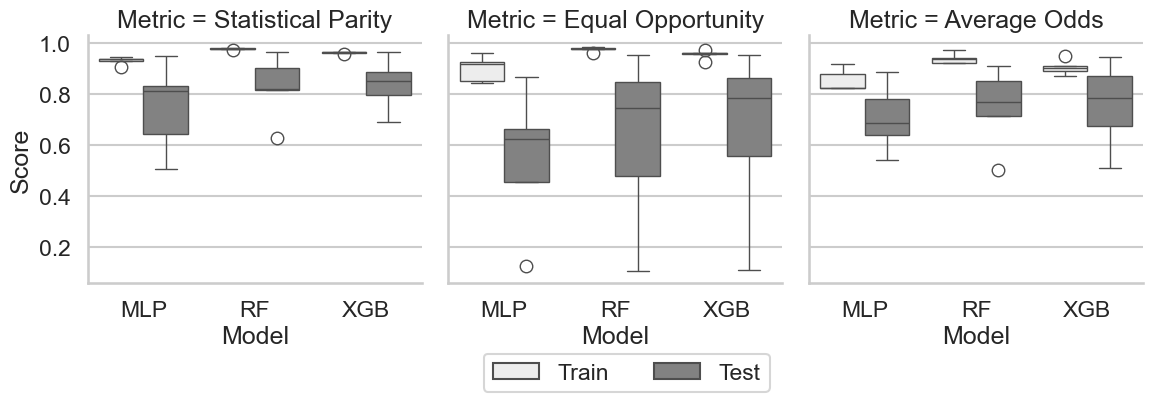

In [8]:
ap = get_full_metrics(sp_mlp_train_ap, sp_rf_train_ap, sp_xgb_train_ap, sp_mlp_test_ap, sp_rf_test_ap, sp_xgb_test_ap, eo_mlp_train_ap, eo_rf_train_ap, eo_xgb_train_ap, eo_mlp_test_ap, eo_rf_test_ap, eo_xgb_test_ap, ao_mlp_train_ap, ao_rf_train_ap, ao_xgb_train_ap, ao_mlp_test_ap, ao_rf_test_ap, ao_xgb_test_ap)
g = sns.FacetGrid(ap, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
# g.fig.suptitle('AUC Score')
g.fig.subplots_adjust(top=0.85)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.savefig("figs/ap_mlp.pdf", bbox_inches="tight")
plt.show()

## Precision

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


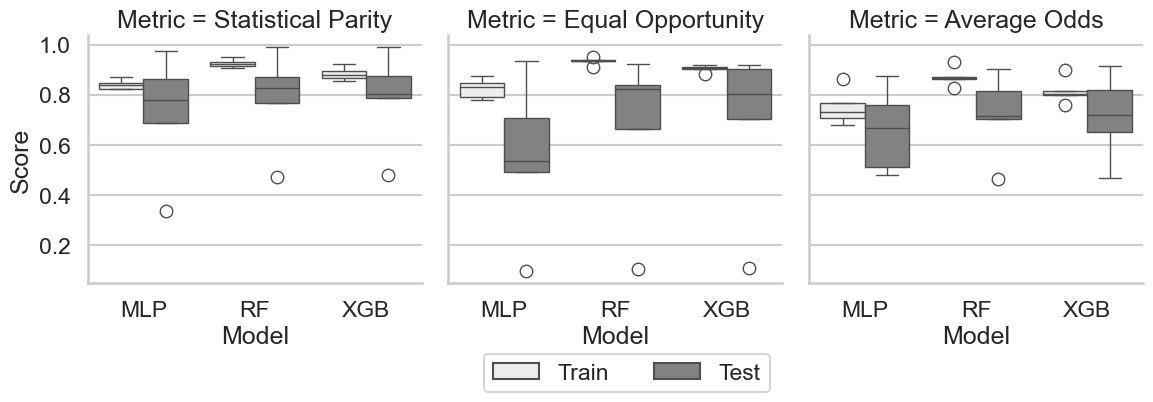

In [9]:
prec = get_full_metrics(sp_mlp_train_prec, sp_rf_train_prec, sp_xgb_train_prec, sp_mlp_test_prec, sp_rf_test_prec, sp_xgb_test_prec, eo_mlp_train_prec, eo_rf_train_prec, eo_xgb_train_prec, eo_mlp_test_prec, eo_rf_test_prec, eo_xgb_test_prec, ao_mlp_train_prec, ao_rf_train_prec, ao_xgb_train_prec, ao_mlp_test_prec, ao_rf_test_prec, ao_xgb_test_prec)
g = sns.FacetGrid(prec, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("F1 Score")
g.figure.savefig("figs/prec_mlp.pdf", bbox_inches="tight")
plt.show()

## Recall

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


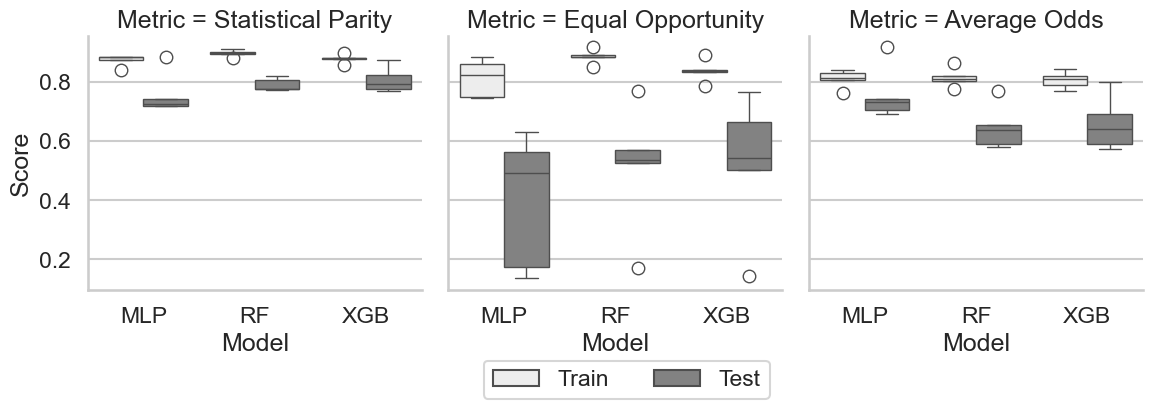

In [10]:
rec = get_full_metrics(sp_mlp_train_rec, sp_rf_train_rec, sp_xgb_train_rec, sp_mlp_test_rec, sp_rf_test_rec, sp_xgb_test_rec, eo_mlp_train_rec, eo_rf_train_rec, eo_xgb_train_rec, eo_mlp_test_rec, eo_rf_test_rec, eo_xgb_test_rec, ao_mlp_train_rec, ao_rf_train_rec, ao_xgb_train_rec, ao_mlp_test_rec, ao_rf_test_rec, ao_xgb_test_rec)
g = sns.FacetGrid(rec, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
# g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("Recall")
g.figure.savefig("figs/rec_mlp.pdf", bbox_inches="tight")
plt.show()

## F1 Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


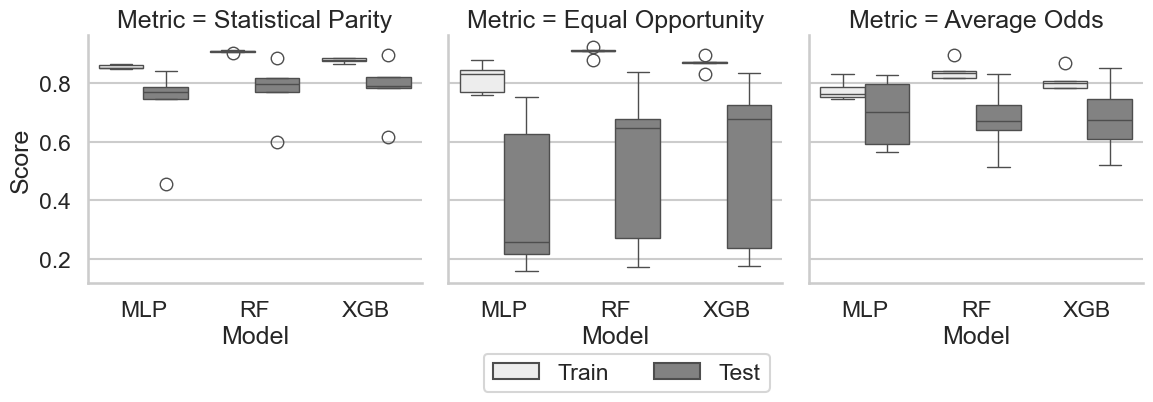

In [11]:
f1 = get_full_metrics(sp_mlp_train_f1, sp_rf_train_f1, sp_xgb_train_f1, sp_mlp_test_f1, sp_rf_test_f1, sp_xgb_test_f1, eo_mlp_train_f1, eo_rf_train_f1, eo_xgb_train_f1, eo_mlp_test_f1, eo_rf_test_f1, eo_xgb_test_f1, ao_mlp_train_f1, ao_rf_train_f1, ao_xgb_train_f1, ao_mlp_test_f1, ao_rf_test_f1, ao_xgb_test_f1)
g = sns.FacetGrid(f1, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("F1 Score")
g.figure.savefig("figs/f1_mlp.pdf", bbox_inches="tight")
plt.show()

## Accuracy Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


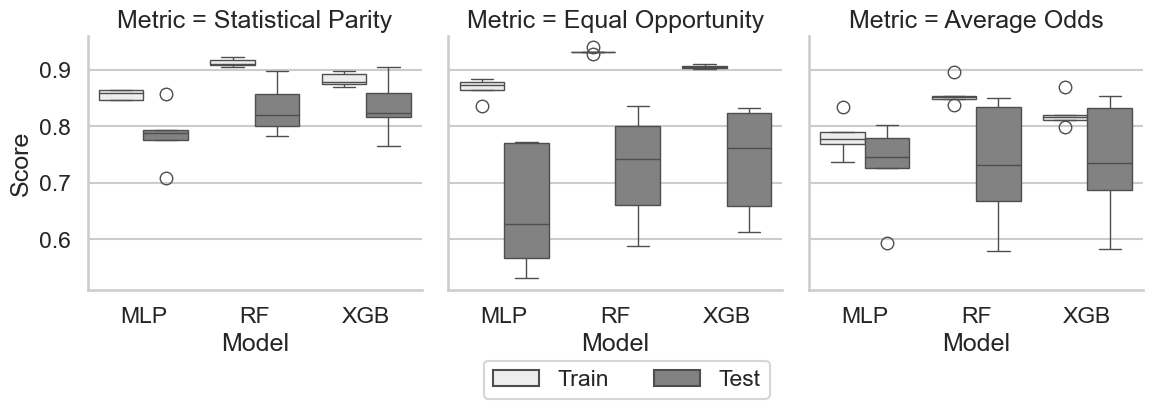

In [12]:
acc = get_full_metrics(sp_mlp_train_acc, sp_rf_train_acc, sp_xgb_train_acc, sp_mlp_test_acc, sp_rf_test_acc, sp_xgb_test_acc, eo_mlp_train_acc, eo_rf_train_acc, eo_xgb_train_acc, eo_mlp_test_acc, eo_rf_test_acc, eo_xgb_test_acc, ao_mlp_train_acc, ao_rf_train_acc, ao_xgb_train_acc, ao_mlp_test_acc, ao_rf_test_acc, ao_xgb_test_acc)
g = sns.FacetGrid(acc, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
# g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("Accuracy Score")
g.savefig("figs/acc_mlp.pdf", bbox_inches="tight")
plt.show()

## RF Data

In [13]:
mlp = load("bias_symptoms_rf_mlp.joblib")
rf = load("bias_symptoms_rf_rf.joblib")
xgb = load("bias_symptoms_rf_xgb.joblib")

In [14]:
data = pd.read_csv('result_class_rf/bias_symptoms_rf.csv', index_col=[0,1])
data.index = data.index.droplevel(0)
labels = ['statistical_parity', 'equal_opportunity', 'average_odds']

In [15]:
# AUC

sp_mlp_train = []
sp_rf_train = []
sp_xgb_train = []
sp_mlp_test = []
sp_rf_test = []
sp_xgb_test = []

eo_mlp_train = []
eo_rf_train = []
eo_xgb_train = []
eo_mlp_test = []
eo_rf_test = []
eo_xgb_test = []

ao_mlp_train = []
ao_rf_train = []
ao_xgb_train = []
ao_mlp_test = []
ao_rf_test = []
ao_xgb_test = []

# Average Precision

sp_mlp_train_ap = []
sp_rf_train_ap = []
sp_xgb_train_ap = []
sp_mlp_test_ap = []
sp_rf_test_ap = []
sp_xgb_test_ap = []

eo_mlp_train_ap = []
eo_rf_train_ap = []
eo_xgb_train_ap = []
eo_mlp_test_ap = []
eo_rf_test_ap = []
eo_xgb_test_ap = []

ao_mlp_train_ap = []
ao_rf_train_ap = []
ao_xgb_train_ap = []
ao_mlp_test_ap = []
ao_rf_test_ap = []
ao_xgb_test_ap = []

# Precision

sp_mlp_train_prec = []
sp_rf_train_prec = []
sp_xgb_train_prec = []
sp_mlp_test_prec = []
sp_rf_test_prec = []
sp_xgb_test_prec = []

eo_mlp_train_prec = []
eo_rf_train_prec = []
eo_xgb_train_prec = []
eo_mlp_test_prec = []
eo_rf_test_prec = []
eo_xgb_test_prec = []

ao_mlp_train_prec = []
ao_rf_train_prec = []
ao_xgb_train_prec = []
ao_mlp_test_prec = []
ao_rf_test_prec = []
ao_xgb_test_prec = []

# Recall

sp_mlp_train_rec = []
sp_rf_train_rec = []
sp_xgb_train_rec = []
sp_mlp_test_rec = []
sp_rf_test_rec = []
sp_xgb_test_rec = []

eo_mlp_train_rec = []
eo_rf_train_rec = []
eo_xgb_train_rec = []
eo_mlp_test_rec = []
eo_rf_test_rec = []
eo_xgb_test_rec = []

ao_mlp_train_rec = []
ao_rf_train_rec = []
ao_xgb_train_rec = []
ao_mlp_test_rec = []
ao_rf_test_rec = []
ao_xgb_test_rec = []

# F1 Score

sp_mlp_train_f1 = []
sp_rf_train_f1 = []
sp_xgb_train_f1 = []
sp_mlp_test_f1 = []
sp_rf_test_f1 = []
sp_xgb_test_f1 = []

eo_mlp_train_f1 = []
eo_rf_train_f1 = []
eo_xgb_train_f1 = []
eo_mlp_test_f1 = []
eo_rf_test_f1 = []
eo_xgb_test_f1 = []

ao_mlp_train_f1 = []
ao_rf_train_f1 = []
ao_xgb_train_f1 = []
ao_mlp_test_f1 = []
ao_rf_test_f1 = []
ao_xgb_test_f1 = []

# Accuracy

sp_mlp_train_acc = []
sp_rf_train_acc = []
sp_xgb_train_acc = []
sp_mlp_test_acc = []
sp_rf_test_acc = []
sp_xgb_test_acc = []

eo_mlp_train_acc = []
eo_rf_train_acc = []
eo_xgb_train_acc = []
eo_mlp_test_acc = []
eo_rf_test_acc = []
eo_xgb_test_acc = []

ao_mlp_train_acc = []
ao_rf_train_acc = []
ao_xgb_train_acc = []
ao_mlp_test_acc = []
ao_rf_test_acc = []
ao_xgb_test_acc = []

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scaler = StandardScaler()
for itrain, itest in kfold.split(data.index.unique().values):
    train_index = data.index.unique()[itrain]
    test_index = data.index.unique()[itest]
    print(train_index)
    print(test_index)
    train = data.loc[train_index]
    test = data.loc[test_index]

    mlp.fit(train.drop(columns=labels), train[labels])
    rf.fit(train.drop(columns=labels), train[labels])
    xgb.fit(train.drop(columns=labels), train[labels])

    mlp_train = mlp.predict_proba(train.drop(columns=labels))
    rf_train = rf.predict_proba(train.drop(columns=labels))
    xgb_train = xgb.predict_proba(train.drop(columns=labels))
    mlp_test = mlp.predict_proba(test.drop(columns=labels))
    rf_test = rf.predict_proba(test.drop(columns=labels))
    xgb_test = xgb.predict_proba(test.drop(columns=labels))

    mlp_train_pred = mlp.predict(train.drop(columns=labels))
    rf_train_pred = rf.predict(train.drop(columns=labels))
    xgb_train_pred = xgb.predict(train.drop(columns=labels))
    mlp_test_pred = mlp.predict(test.drop(columns=labels))
    rf_test_pred = rf.predict(test.drop(columns=labels))
    xgb_test_pred = xgb.predict(test.drop(columns=labels))

    sp_mlp_train.append(roc_auc_score(train["statistical_parity"], mlp_train[:, 0]))
    sp_rf_train.append(roc_auc_score(train["statistical_parity"], rf_train[0][:, 1]))
    sp_xgb_train.append(roc_auc_score(train["statistical_parity"], xgb_train[:, 0]))
    sp_mlp_test.append(roc_auc_score(test["statistical_parity"], mlp_test[:, 0]))
    sp_rf_test.append(roc_auc_score(test["statistical_parity"], rf_test[0][:, 1]))
    sp_xgb_test.append(roc_auc_score(test["statistical_parity"], xgb_test[:, 0]))

    eo_mlp_train.append(roc_auc_score(train["equal_opportunity"], mlp_train[:, 1]))
    eo_rf_train.append(roc_auc_score(train["equal_opportunity"], rf_train[1][:, 1]))
    eo_xgb_train.append(roc_auc_score(train["equal_opportunity"], xgb_train[:, 1]))
    eo_mlp_test.append(roc_auc_score(test["equal_opportunity"], mlp_test[:, 1]))
    eo_rf_test.append(roc_auc_score(test["equal_opportunity"], rf_test[1][:, 1]))
    eo_xgb_test.append(roc_auc_score(test["equal_opportunity"], xgb_test[:, 1]))

    ao_mlp_train.append(roc_auc_score(train["average_odds"], mlp_train[:, 2]))
    ao_rf_train.append(roc_auc_score(train["average_odds"], rf_train[2][:, 1]))
    ao_xgb_train.append(roc_auc_score(train["average_odds"], xgb_train[:, 2]))
    ao_mlp_test.append(roc_auc_score(test["average_odds"], mlp_test[:, 2]))
    ao_rf_test.append(roc_auc_score(test["average_odds"], rf_test[2][:, 1]))
    ao_xgb_test.append(roc_auc_score(test["average_odds"], xgb_test[:, 2]))

    sp_mlp_train_ap.append(average_precision_score(train["statistical_parity"], mlp_train[:, 0]))
    sp_rf_train_ap.append(average_precision_score(train["statistical_parity"], rf_train[0][:, 1]))
    sp_xgb_train_ap.append(average_precision_score(train["statistical_parity"], xgb_train[:, 0]))
    sp_mlp_test_ap.append(average_precision_score(test["statistical_parity"], mlp_test[:, 0]))
    sp_rf_test_ap.append(average_precision_score(test["statistical_parity"], rf_test[0][:, 1]))
    sp_xgb_test_ap.append(average_precision_score(test["statistical_parity"], xgb_test[:, 0]))

    eo_mlp_train_ap.append(average_precision_score(train["equal_opportunity"], mlp_train[:, 1]))
    eo_rf_train_ap.append(average_precision_score(train["equal_opportunity"], rf_train[1][:, 1]))
    eo_xgb_train_ap.append(average_precision_score(train["equal_opportunity"], xgb_train[:, 1]))
    eo_mlp_test_ap.append(average_precision_score(test["equal_opportunity"], mlp_test[:, 1]))
    eo_rf_test_ap.append(average_precision_score(test["equal_opportunity"], rf_test[1][:, 1]))
    eo_xgb_test_ap.append(average_precision_score(test["equal_opportunity"], xgb_test[:, 1]))

    ao_mlp_train_ap.append(average_precision_score(train["average_odds"], mlp_train[:, 2]))
    ao_rf_train_ap.append(average_precision_score(train["average_odds"], rf_train[2][:, 1]))
    ao_xgb_train_ap.append(average_precision_score(train["average_odds"], xgb_train[:, 2]))
    ao_mlp_test_ap.append(average_precision_score(test["average_odds"], mlp_test[:, 2]))
    ao_rf_test_ap.append(average_precision_score(test["average_odds"], rf_test[2][:, 1]))
    ao_xgb_test_ap.append(average_precision_score(test["average_odds"], xgb_test[:, 2]))

    sp_mlp_train_prec.append(precision_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_prec.append(precision_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_prec.append(precision_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_prec.append(precision_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_prec.append(precision_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_prec.append(precision_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_prec.append(precision_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_prec.append(precision_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_prec.append(precision_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_prec.append(precision_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_prec.append(precision_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_prec.append(precision_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_prec.append(precision_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_prec.append(precision_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_prec.append(precision_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_prec.append(precision_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_prec.append(precision_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_prec.append(precision_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_rec.append(recall_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_rec.append(recall_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_rec.append(recall_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_rec.append(recall_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_rec.append(recall_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_rec.append(recall_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_rec.append(recall_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_rec.append(recall_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_rec.append(recall_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_rec.append(recall_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_rec.append(recall_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_rec.append(recall_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_rec.append(recall_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_rec.append(recall_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_rec.append(recall_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_rec.append(recall_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_rec.append(recall_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_rec.append(recall_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_f1.append(f1_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_f1.append(f1_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_f1.append(f1_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_f1.append(f1_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_f1.append(f1_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_f1.append(f1_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_f1.append(f1_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_f1.append(f1_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_f1.append(f1_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_f1.append(f1_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_f1.append(f1_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_f1.append(f1_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_f1.append(f1_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_f1.append(f1_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_f1.append(f1_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_f1.append(f1_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_f1.append(f1_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_f1.append(f1_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_acc.append(accuracy_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_acc.append(accuracy_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_acc.append(accuracy_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_acc.append(accuracy_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_acc.append(accuracy_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_acc.append(accuracy_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_acc.append(accuracy_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_acc.append(accuracy_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_acc.append(accuracy_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_acc.append(accuracy_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_acc.append(accuracy_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_acc.append(accuracy_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_acc.append(accuracy_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_acc.append(accuracy_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_acc.append(accuracy_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_acc.append(accuracy_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_acc.append(accuracy_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_acc.append(accuracy_score(test["average_odds"], xgb_test_pred[:, 2]))

Index(['arrhythmia', 'bank', 'cmc', 'compas', 'credit', 'crime', 'diabetic',
       'german', 'health', 'ibm', 'law', 'medical', 'obesity', 'placement',
       'ricci', 'student', 'us', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['adult', 'drug', 'hearth', 'park', 'resyduo'], dtype='object', name='data')
Index(['adult', 'bank', 'cmc', 'compas', 'crime', 'diabetic', 'drug', 'health',
       'hearth', 'ibm', 'medical', 'obesity', 'park', 'placement', 'resyduo',
       'ricci', 'student', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['arrhythmia', 'credit', 'german', 'law', 'us'], dtype='object', name='data')
Index(['adult', 'arrhythmia', 'credit', 'crime', 'diabetic', 'drug', 'german',
       'health', 'hearth', 'law', 'medical', 'park', 'placement', 'resyduo',
       'ricci', 'student', 'us', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['bank', 'cmc', 'compas', 'ibm', 'obesity'], dtype='object', name='data')
Index(['adult', 'arrhythmia'

In [16]:
def get_full_metrics(sp_mlp_train, sp_rf_train, sp_xgb_train, sp_mlp_test, sp_rf_test, sp_xgb_test, eo_mlp_train, eo_rf_train, eo_xgb_train, eo_mlp_test, eo_rf_test, eo_xgb_test, ao_mlp_train, ao_rf_train, ao_xgb_train, ao_mlp_test, ao_rf_test, ao_xgb_test):
    df_sp = pd.DataFrame(
        {"MLP": sp_mlp_train, "RF": sp_rf_train, "XGB": sp_xgb_train, "Fold": "Train"}
    )
    df_sp = pd.concat(
        [
            df_sp,
            pd.DataFrame(
                {"MLP": sp_mlp_test, "RF": sp_rf_test, "XGB": sp_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_sp = pd.melt(df_sp, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_sp["Metric"] = "Statistical Parity"
    df_eo = pd.DataFrame(
        {"MLP": eo_mlp_train, "RF": eo_rf_train, "XGB": eo_xgb_train, "Fold": "Train"}
    )
    df_eo = pd.concat(
        [
            df_eo,
            pd.DataFrame(
                {"MLP": eo_mlp_test, "RF": eo_rf_test, "XGB": eo_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_eo = pd.melt(df_eo, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_eo["Metric"] = "Equal Opportunity"

    df_ao = pd.DataFrame(
        {"MLP": ao_mlp_train, "RF": ao_rf_train, "XGB": ao_xgb_train, "Fold": "Train"}
    )
    df_ao = pd.concat(
        [
            df_ao,
            pd.DataFrame(
                {"MLP": ao_mlp_test, "RF": ao_rf_test, "XGB": ao_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_ao = pd.melt(df_ao, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_ao["Metric"] = "Average Odds"
    auc = pd.concat([df_sp, df_eo, df_ao])
    return auc

## AUC Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


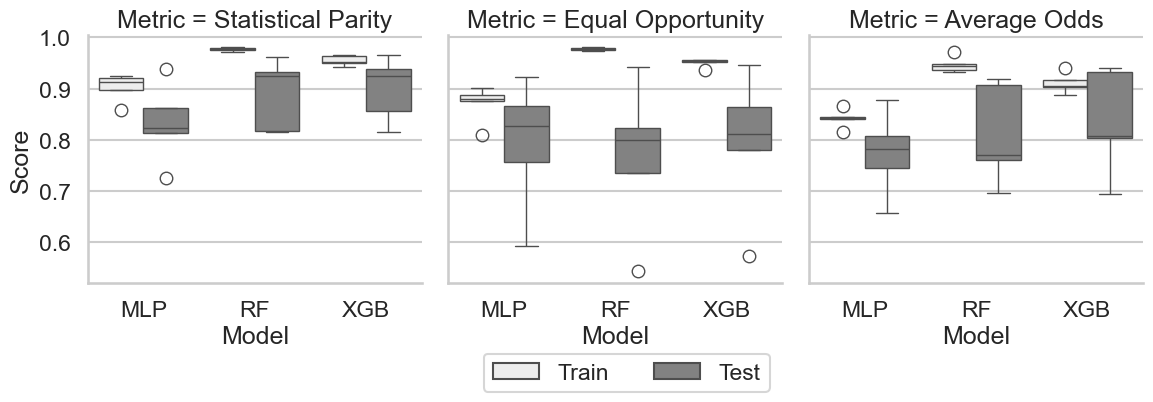

In [17]:
auc = get_full_metrics(sp_mlp_train, sp_rf_train, sp_xgb_train, sp_mlp_test, sp_rf_test, sp_xgb_test, eo_mlp_train, eo_rf_train, eo_xgb_train, eo_mlp_test, eo_rf_test, eo_xgb_test, ao_mlp_train, ao_rf_train, ao_xgb_train, ao_mlp_test, ao_rf_test, ao_xgb_test)
g = sns.FacetGrid(auc, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
# g.fig.suptitle('AUC Score')
g.fig.subplots_adjust(top=0.85)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.savefig('figs/auc_rf.pdf', bbox_inches='tight')
plt.show()

## Average Precision Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


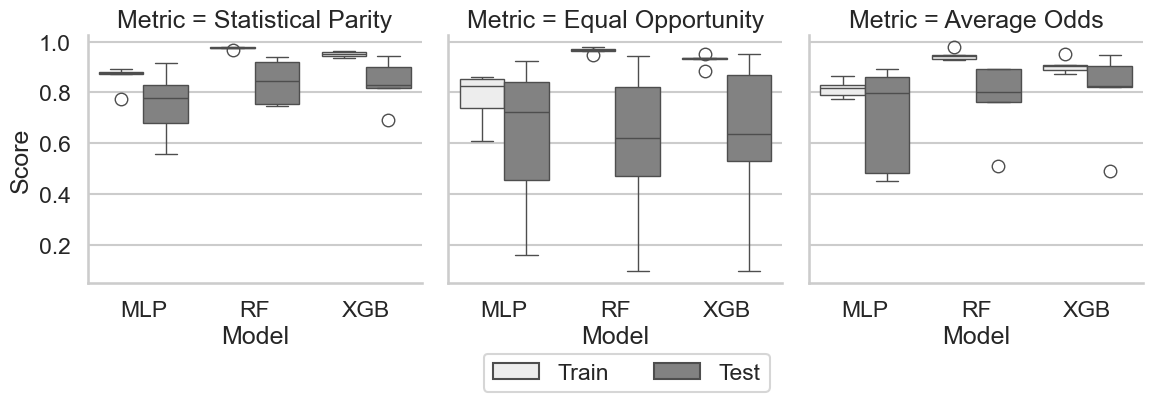

In [18]:
ap = get_full_metrics(sp_mlp_train_ap, sp_rf_train_ap, sp_xgb_train_ap, sp_mlp_test_ap, sp_rf_test_ap, sp_xgb_test_ap, eo_mlp_train_ap, eo_rf_train_ap, eo_xgb_train_ap, eo_mlp_test_ap, eo_rf_test_ap, eo_xgb_test_ap, ao_mlp_train_ap, ao_rf_train_ap, ao_xgb_train_ap, ao_mlp_test_ap, ao_rf_test_ap, ao_xgb_test_ap)
g = sns.FacetGrid(ap, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
# g.fig.suptitle('AUC Score')
g.fig.subplots_adjust(top=0.85)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.savefig("figs/ap_rf.pdf", bbox_inches="tight")
plt.show()

## Precision

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


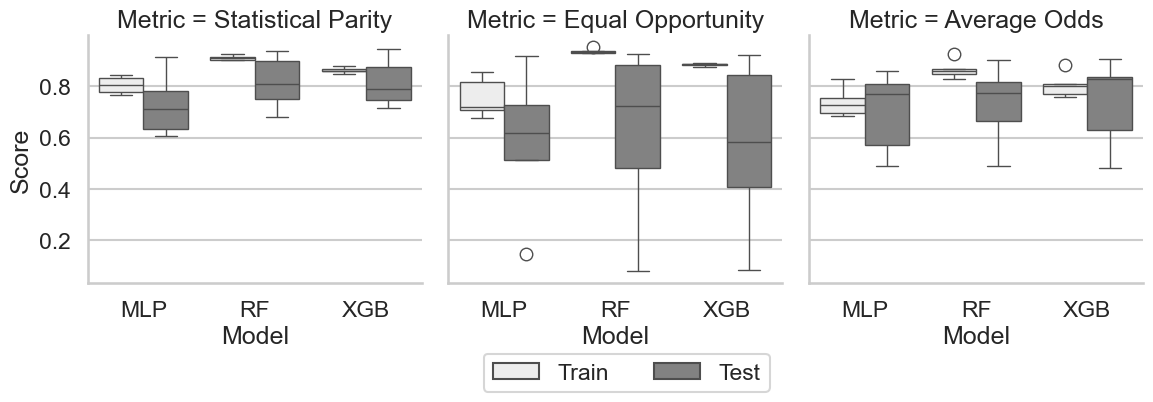

In [19]:
prec = get_full_metrics(sp_mlp_train_prec, sp_rf_train_prec, sp_xgb_train_prec, sp_mlp_test_prec, sp_rf_test_prec, sp_xgb_test_prec, eo_mlp_train_prec, eo_rf_train_prec, eo_xgb_train_prec, eo_mlp_test_prec, eo_rf_test_prec, eo_xgb_test_prec, ao_mlp_train_prec, ao_rf_train_prec, ao_xgb_train_prec, ao_mlp_test_prec, ao_rf_test_prec, ao_xgb_test_prec)
g = sns.FacetGrid(prec, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("F1 Score")
g.figure.savefig("figs/prec_rf.pdf", bbox_inches="tight")
plt.show()

## Recall

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


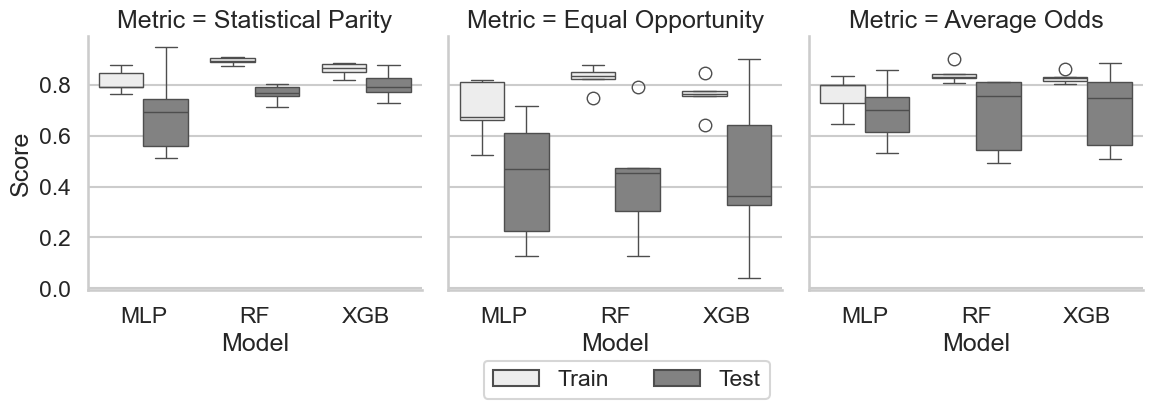

In [20]:
rec = get_full_metrics(sp_mlp_train_rec, sp_rf_train_rec, sp_xgb_train_rec, sp_mlp_test_rec, sp_rf_test_rec, sp_xgb_test_rec, eo_mlp_train_rec, eo_rf_train_rec, eo_xgb_train_rec, eo_mlp_test_rec, eo_rf_test_rec, eo_xgb_test_rec, ao_mlp_train_rec, ao_rf_train_rec, ao_xgb_train_rec, ao_mlp_test_rec, ao_rf_test_rec, ao_xgb_test_rec)
g = sns.FacetGrid(rec, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
# g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("Recall")
g.figure.savefig("figs/rec_rf.pdf", bbox_inches="tight")
plt.show()

## F1 Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


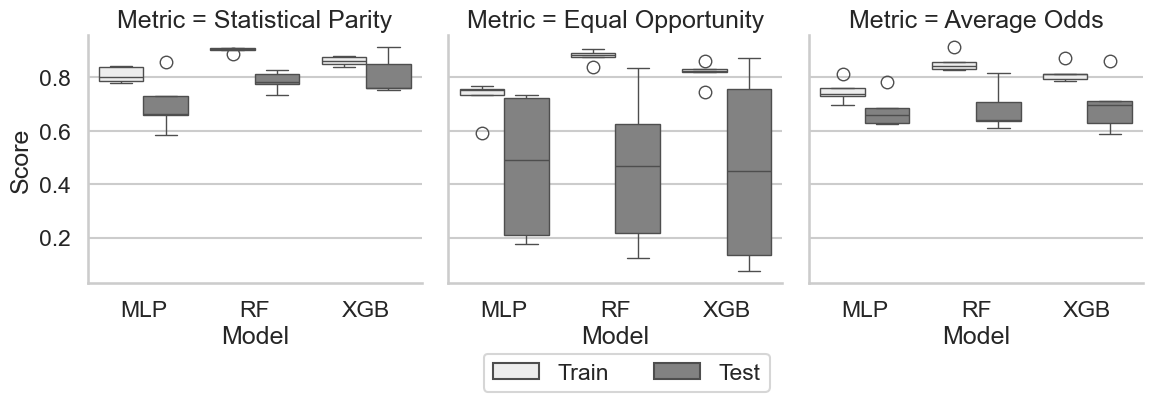

In [21]:
f1 = get_full_metrics(sp_mlp_train_f1, sp_rf_train_f1, sp_xgb_train_f1, sp_mlp_test_f1, sp_rf_test_f1, sp_xgb_test_f1, eo_mlp_train_f1, eo_rf_train_f1, eo_xgb_train_f1, eo_mlp_test_f1, eo_rf_test_f1, eo_xgb_test_f1, ao_mlp_train_f1, ao_rf_train_f1, ao_xgb_train_f1, ao_mlp_test_f1, ao_rf_test_f1, ao_xgb_test_f1)
g = sns.FacetGrid(f1, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("F1 Score")
g.figure.savefig("figs/f1_rf.pdf", bbox_inches="tight")
plt.show()

## Accuracy Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


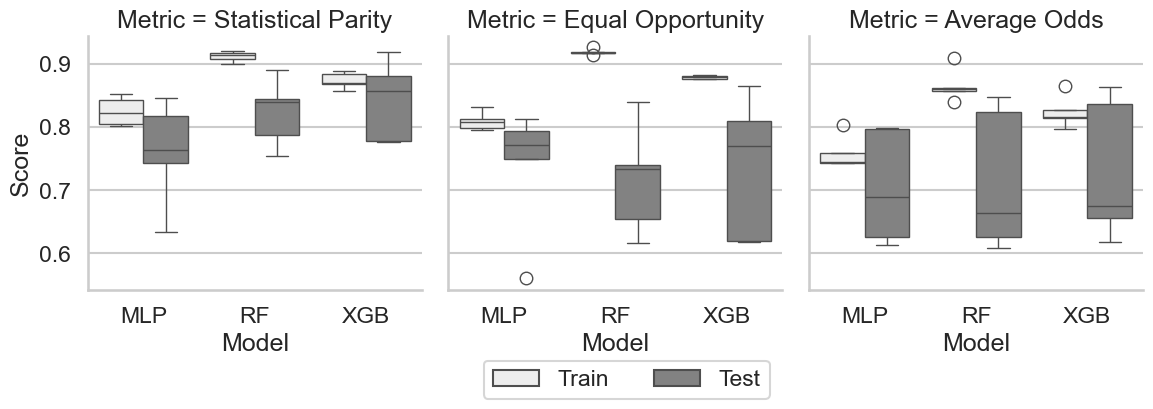

In [22]:
acc = get_full_metrics(sp_mlp_train_acc, sp_rf_train_acc, sp_xgb_train_acc, sp_mlp_test_acc, sp_rf_test_acc, sp_xgb_test_acc, eo_mlp_train_acc, eo_rf_train_acc, eo_xgb_train_acc, eo_mlp_test_acc, eo_rf_test_acc, eo_xgb_test_acc, ao_mlp_train_acc, ao_rf_train_acc, ao_xgb_train_acc, ao_mlp_test_acc, ao_rf_test_acc, ao_xgb_test_acc)
g = sns.FacetGrid(acc, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
# g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("Accuracy Score")
g.savefig("figs/acc_rf.pdf", bbox_inches="tight")
plt.show()